In [27]:
from matplotlib import pyplot as plt
from molecular import raman_scattering; reload(raman_scattering)

<module 'molecular.raman_scattering' from '/media/sf_Work/Work/Programming/modules/molecular/molecular/raman_scattering.py'>

In [28]:
m = raman_scattering.DepolarizationLidar(532, 1)

Line2D(Filter fwhm 1 nm)


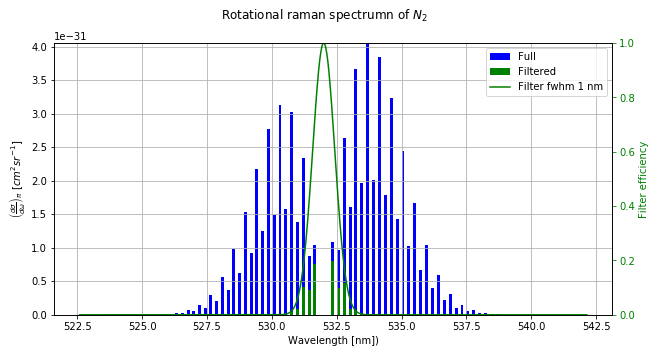

In [29]:
m.plot_spectrum(300., raman_scattering.N2_parameters)
#plt.savefig('depol_1064.png', dpi=150)

In [30]:
m.delta_mol_temperature(300.)

(0.004176597341872926, 0.05438551159015462, 0.07145810968185458)

## Comparison with Behrendt and Nakamura, 2002

In [31]:
raman_scattering.N2_parameters = {'name': "N_{2}",
                 'B0': 1.989500,
                 'D0': 5.48E-6,
                 'I': 1,
                 'gamma_square': 0.509E-48,
                 'epsilon': 0.161,
                 'g': [6, 3],
                 'relative_concentration': 0.79}  # for even/odd J

raman_scattering.O2_parameters = {'name': "O_{2}",
                 'B0': 1.437682,
                 'D0': 4.85E-6,
                 'I': 0,
                 'gamma_square': 1.27E-48,
                 'epsilon': 0.467,
                 'g': [0, 1],
                 'relative_concentration': 0.21}  # for even/odd J

In [32]:
filter_widhts = [0.1, 0.3, 0.5, 0.7, 1.0 ,1.5 ,2, 3, 5, 7, 10, 15]

print("FWHM    x_N2    x_O2    d_240   Dd")
for width in filter_widhts:
    lidar = raman_scattering.DepolarizationLidar(532, width)
    depol_240, x_N2, x_O2 = lidar.delta_mol_temperature(240.)
    depol_200, _, _ = lidar.delta_mol_temperature(200.)
    depol_280, _, _ = lidar.delta_mol_temperature(280.)
    delta_depol = (depol_200 - depol_280) / depol_240
    output = "{:.1f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.1f}".format(width, x_N2*100, x_O2*100, depol_240 * 1e3, delta_depol*100)
    print(output)
    

FWHM    x_N2    x_O2    d_240   Dd
0.1	0.00	0.00	3.61	0.0
0.3	0.12	0.05	3.62	0.1
0.5	1.28	1.29	3.75	1.2
0.7	3.05	3.75	3.97	2.9
1.0	6.67	8.72	4.42	5.6
1.5	14.68	19.09	5.39	9.0
2.0	23.91	30.24	6.46	10.5
3.0	41.92	49.96	8.45	10.1
5.0	66.97	73.74	11.06	6.5
7.0	79.94	84.67	12.34	4.1
10.0	89.07	91.86	13.22	2.3
15.0	94.83	96.22	13.77	1.1


![Behrend values](images/behrend_delta_mol.PNG)

In [41]:
wn = 10**7 / 532.
raman_scattering.delta_mol(wn, [raman_scattering.N2_parameters, raman_scattering.O2_parameters], [0, 0])

0.003614956079683788

In [44]:
print("Gamma2  - N2: %s" % raman_scattering.gamma_square_N2(wn))
print("Gamma2  - O2: %s" % raman_scattering.gamma_square_O2(wn))
print("Epsilon - N2: %s" % raman_scattering.epsilon_N2(wn))
print("Epsilon - O2: %s" % raman_scattering.epsilon_O2(wn))

Gamma2  - N2: 4.97342321778e-49
Gamma2  - O2: 1.20619585218e-48
Epsilon - N2: 0.158040208604
Epsilon - O2: 0.462155669668
